# Reducing the dataset, converting to single label classification

#### I'm going to focus on 4 main genres - Drama, Comedy, Action, Adventure.
#### I'll be also converting to singe genre classification. It means that frames that were labeled with only one of the above genres will keep it and the other will be discarded. When both of the genres are the same as the above ones the main one will be chosen at random. In case none of the genres is the same as above ones the one will be also chosen at random and after further investigation it will be merged with one of the bigger genres.

In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from collections import Counter

In [2]:
data_df = pd.read_csv('..\\files_slcr\\data.tsv', sep='\t', index_col=0)
data_df.head()

,path,genre,Action,Adventure,Comedy,Crime,Drama,Horror,Romance,Thriller
0,frames\Action\06Its9LhIHQ\1196.jpg,['Action'],1,0,0,0,0,0,0,0
1,frames\Action\06Its9LhIHQ\1426.jpg,['Action'],1,0,0,0,0,0,0,0
2,frames\Action\06Its9LhIHQ\1656.jpg,['Action'],1,0,0,0,0,0,0,0
3,frames\Action\06Its9LhIHQ\1886.jpg,['Action'],1,0,0,0,0,0,0,0
4,frames\Action\06Its9LhIHQ\2116.jpg,['Action'],1,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Occurence of different combinations of genres')

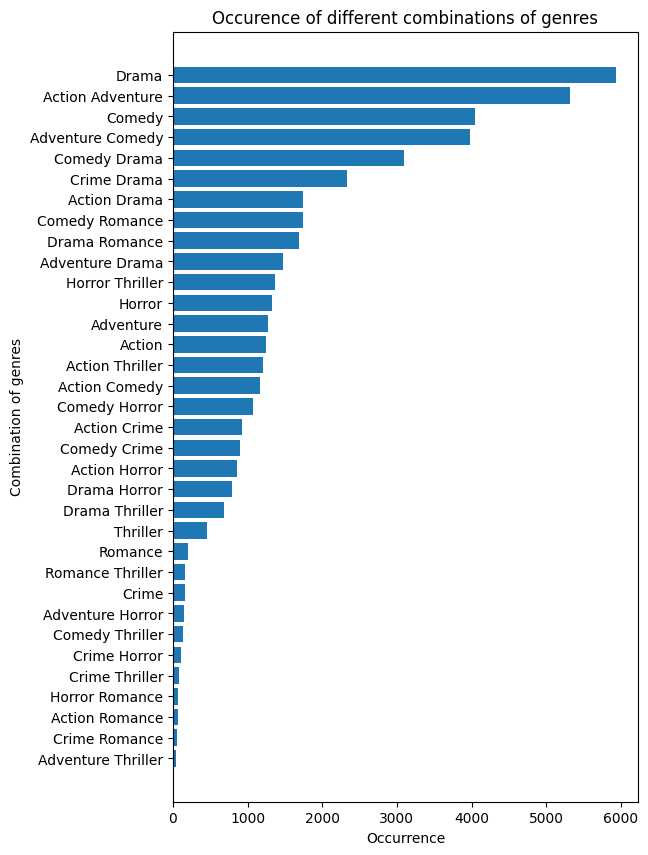

In [3]:
genres_list = []

for index, row in data_df.iterrows():
    genres = row['genre'].strip('][').replace(' ', '').replace('\'', '').replace(',', ' ')
    genres_list.append(genres)

existing_genres = dict(sorted(dict(Counter(genres_list)).items(), key=lambda x:x[1], reverse=False))
    
plt.figure(figsize = (6, 10))

plt.barh(list(existing_genres.keys()), list(existing_genres.values()))

plt.ylabel("Combination of genres")
plt.xlabel("Occurrence")
plt.title("Occurence of different combinations of genres")

#### In the plot above I can see that Action and Adventure are the second biggest group, so let's assume that I'll merge them together.
#### Next one to merge would be Comedy and Romance.
#### Finally based on semantic meaning Thriller, Horror and Crime can be merged together.
#### I'm left with:
1. Drama
2. Action Adventure
3. Comedy Romance
4. Thriller Horror Crime

In [4]:
def new_df_row(path, new_genre, df_columns):
    new_row_list = [path, new_genre] +[int(new_genre == genre) for genre in df_columns.tolist()[2:]]
    header = pd.DataFrame(df_columns).loc[:, 0].values.tolist()
    new_row_dict = dict(zip(header, new_row_list))
    return new_row_dict

def get_genre_distribution_slc(df) -> dict:
    
    genres_count = {}
    
    for genre in pd.DataFrame(df.columns).loc[2:, 0].values.tolist():
        
        genres_count[genre] = 0    
    

    # Loop over subfolders in the parent folder
    for index, row in df.iterrows():
        
        genres_count[row['genre']] += 1


    genres_count = dict(sorted(genres_count.items(), key=lambda x:x[1], reverse=True))
                
    plt.figure(figsize = (10, 5))

    plt.bar(genres_count.keys(), genres_count.values())
    
    plt.xlabel("Genres")
    plt.ylabel("Occurrence")
    plt.title("Occurence of genres")

    return genres_count


In [5]:
single_genre_data_df = pd.DataFrame(columns=['path', 'genre', 'Drama', 'Act_Adv', 'Com_Rom', 'Thr_Hor_Cri'])

for index, row in data_df.iterrows():
    all_genres = row['genre'].strip('][').replace(' ', '').replace('\'', '').split(',')
    
    if len(all_genres) == 1 and all_genres[0] == 'Drama':
        new_row_df = new_df_row(row['path'], 'Drama', single_genre_data_df.columns)
        single_genre_data_df = pd.concat([single_genre_data_df, pd.DataFrame([new_row_df])], ignore_index=True)
    
    elif len(all_genres) == 1 and all_genres[0] in ['Action', 'Adventure']:
        new_row_df = new_df_row(row['path'], 'Act_Adv', single_genre_data_df.columns)
        single_genre_data_df = pd.concat([single_genre_data_df, pd.DataFrame([new_row_df])], ignore_index=True)   
        
    elif len(all_genres) == 1 and all_genres[0] in ['Comedy', 'Romance']:
        new_row_df = new_df_row(row['path'], 'Com_Rom', single_genre_data_df.columns)
        single_genre_data_df = pd.concat([single_genre_data_df, pd.DataFrame([new_row_df])], ignore_index=True)  
        
    elif len(all_genres) == 1 and all_genres[0] in ['Thriller', 'Horror', 'Crime']:
        new_row_df = new_df_row(row['path'], 'Thr_Hor_Cri', single_genre_data_df.columns)
        single_genre_data_df = pd.concat([single_genre_data_df, pd.DataFrame([new_row_df])], ignore_index=True) 
    
    elif all_genres[0] in ['Thriller', 'Horror', 'Crime']:
        new_row_df = new_df_row(row['path'], 'Thr_Hor_Cri', single_genre_data_df.columns)
        single_genre_data_df = pd.concat([single_genre_data_df, pd.DataFrame([new_row_df])], ignore_index=True) 
        
    elif all_genres[1] in ['Thriller', 'Horror', 'Crime']:
        new_row_df = new_df_row(row['path'], 'Thr_Hor_Cri', single_genre_data_df.columns)
        single_genre_data_df = pd.concat([single_genre_data_df, pd.DataFrame([new_row_df])], ignore_index=True) 
        
    elif all_genres[0] in ['Action', 'Adventure']:
        new_row_df = new_df_row(row['path'], 'Act_Adv', single_genre_data_df.columns)
        single_genre_data_df = pd.concat([single_genre_data_df, pd.DataFrame([new_row_df])], ignore_index=True) 
        
    elif all_genres[1] in ['Action', 'Adventure']:
        new_row_df = new_df_row(row['path'], 'Act_Adv', single_genre_data_df.columns)
        single_genre_data_df = pd.concat([single_genre_data_df, pd.DataFrame([new_row_df])], ignore_index=True) 
        
    elif all_genres[0] in ['Comedy', 'Romance']:
        new_row_df = new_df_row(row['path'], 'Com_Rom', single_genre_data_df.columns)
        single_genre_data_df = pd.concat([single_genre_data_df, pd.DataFrame([new_row_df])], ignore_index=True) 
        
    elif all_genres[1] in ['Comedy', 'Romance']:
        new_row_df = new_df_row(row['path'], 'Com_Rom', single_genre_data_df.columns)
        single_genre_data_df = pd.concat([single_genre_data_df, pd.DataFrame([new_row_df])], ignore_index=True) 
    
    # elif all_genres[0] not in main_genres and all_genres[1] in main_genres:
    #     new_row_df = new_df_row(row['path'], all_genres[1], data_df.columns)
    #     single_genre_data_df = pd.concat([single_genre_data_df, pd.DataFrame([new_row_df])], ignore_index=True)
            
    # elif all_genres[0] in main_genres and all_genres[1] in main_genres:
    #     random_genre = np.random.choice(all_genres)
    #     new_row_df = new_df_row(row['path'], random_genre, data_df.columns)
    #     single_genre_data_df = pd.concat([single_genre_data_df, pd.DataFrame([new_row_df])], ignore_index=True)
        
    # elif all_genres[0] not in main_genres and all_genres[1] not in main_genres:
    #     random_genre = np.random.choice(all_genres)
    #     new_row_df = new_df_row(row['path'], random_genre, data_df.columns)
    #     single_genre_data_df = pd.concat([single_genre_data_df, pd.DataFrame([new_row_df])], ignore_index=True)

In [6]:
print(len(data_df))
print(len(single_genre_data_df))

45845
45845


{'Act_Adv': 16277, 'Thr_Hor_Cri': 12869, 'Com_Rom': 10768, 'Drama': 5931}

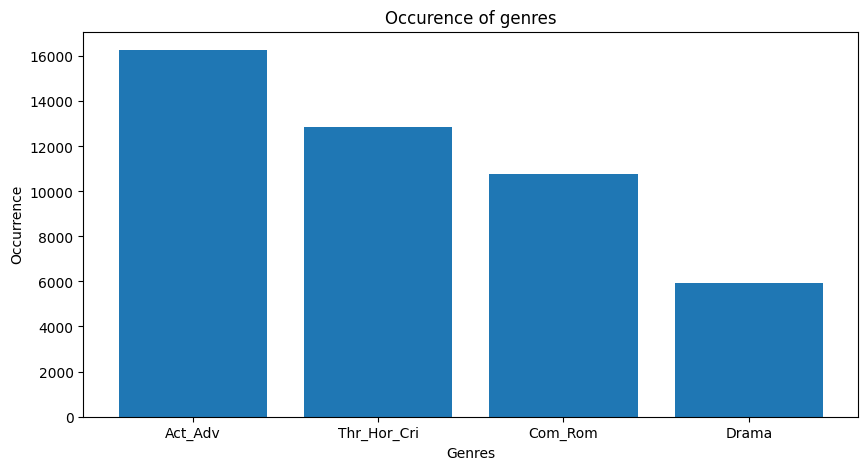

In [7]:
get_genre_distribution_slc(single_genre_data_df)

#### Now it's time to establish a new train and test split for the first experiment

In [8]:
single_genre_data_df = single_genre_data_df.sample(frac=1).reset_index(drop=True)
single_genre_data_df = single_genre_data_df.loc[:, ~single_genre_data_df.columns.str.contains('^Unnamed')]

df_train_random, df_test_random = train_test_split(single_genre_data_df, test_size=0.15)

df_train_random = df_train_random.reset_index(drop=True)
df_test_random = df_test_random.reset_index(drop=True)

38968


,path,genre,Drama,Act_Adv,Com_Rom,Thr_Hor_Cri
0,frames\Comedy\ojiHA64n6iw\2346.jpg,Com_Rom,0,0,1,0
1,frames\Adventure_Drama\RGuY5r-7ta4\46.jpg,Act_Adv,0,1,0,0
2,frames\Comedy_Romance\F8UwjJzF4LY\1656.jpg,Com_Rom,0,0,1,0
3,frames\Action_Horror\1d-Q6pT4pxo\506.jpg,Thr_Hor_Cri,0,0,0,1
4,frames\Adventure_Thriller\sIY7BQkbIT8\1196.jpg,Thr_Hor_Cri,0,0,0,1


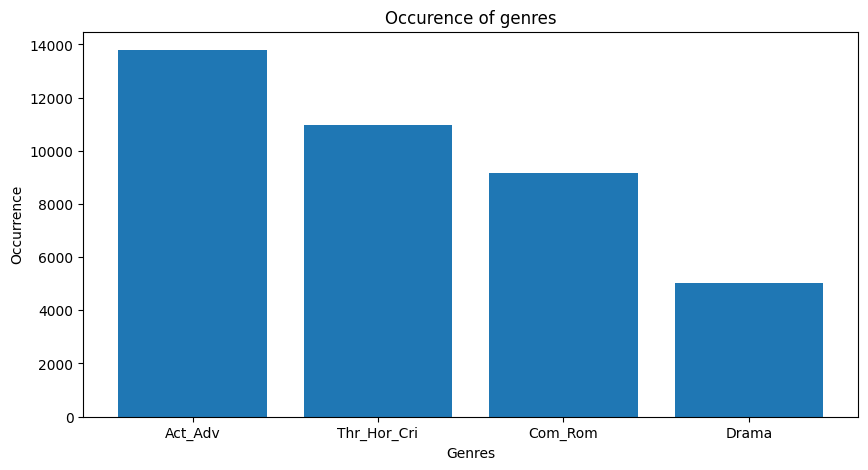

In [9]:
# Check the distribution of a training set

print(len(df_train_random))
get_genre_distribution_slc(df_train_random)

df_train_random.head()

6877


,path,genre,Drama,Act_Adv,Com_Rom,Thr_Hor_Cri
0,frames\Action_Crime\WQnv22Qnp8s\46.jpg,Thr_Hor_Cri,0,0,0,1
1,frames\Romance\nQIfRCUlfz4\966.jpg,Com_Rom,0,0,1,0
2,frames\Comedy_Romance\I_mYmJVMef0\1196.jpg,Com_Rom,0,0,1,0
3,frames\Action_Adventure\yodVQ5QAc88\276.jpg,Act_Adv,0,1,0,0
4,frames\Action\4331uXY0nxA\276.jpg,Act_Adv,0,1,0,0


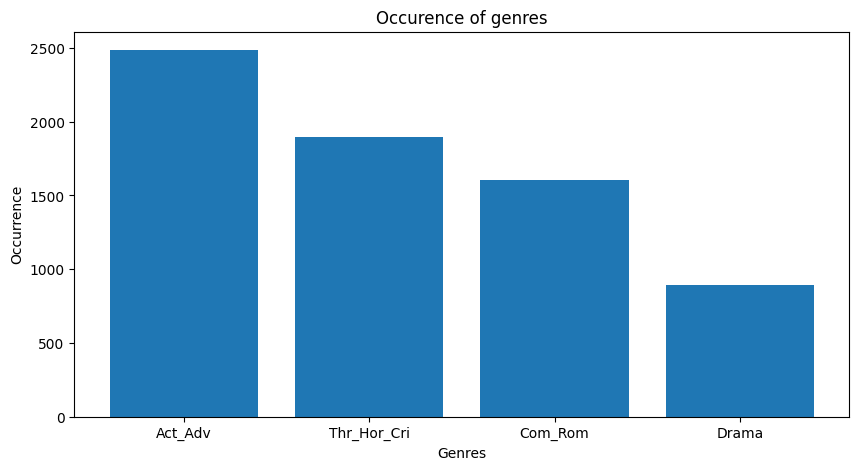

In [10]:
# Check the distribution of a test set

print(len(df_test_random))
get_genre_distribution_slc(df_test_random)

df_test_random.head()

In [11]:
# If the distribution is similar - save new .tsv files

df_train_random.to_csv(r'..\files_slcr\data_train_random.tsv', sep="\t")
df_test_random.to_csv(r'..\files_slcr\data_test_random.tsv', sep="\t")

In [12]:
single_genre_data_df.columns.tolist()[2:]

['Drama', 'Act_Adv', 'Com_Rom', 'Thr_Hor_Cri']

In [13]:
import random

N = 4
np_arr = [[int(random.random()*100000) for i in range(N)] for j in range(N)]

genres = single_genre_data_df.columns.tolist()[2:]

In [14]:
print(
    "{:12} {:>12} {:>12} {:>12} {:>12}".format("Genre", *genres)
    + "\n"
)

for i in range(len(genres)):
    print(
        "{:12} {:12} {:12} {:12} {:12}".format(genres[i], *np_arr[i])
        + "\n"
    )



Genre               Drama      Act_Adv      Com_Rom  Thr_Hor_Cri

Drama                5708        84438        85109        42198

Act_Adv              4073        46891        18393         9315

Com_Rom             46097        35828        52313        79689

Thr_Hor_Cri         87748        57695        95242        25658

